## Data that Connects You to Home

AD DataProperties is a fintech real estate disruptor believing that property buying, selling and renting properties should be easy for property owners and property managers. At AD Data we have developed many tools by aggregating data and deploying prediction tools over the years to help our customers with the datafication of real estate in the 21st century. Our most recent tool is designed for property owners and property managers who are looking for ways to streamline and set optimal prices for their properties around the country. 

This recent tool, called AD PriceSetter, was created specifically using data from Austin, Texas, and in the next few months we plan to release it to property owners in over 50 cities nationwide. Our tool harnesses the power of Big Data and Machine Learning based AI by analyzing multiple data features of currently listed properties from around a given city. We use that data to generate a model with which you as a property owner, or manager, use to set the most optimal prices for renting out your Airbnb properties. The following is meant as an outline to provide you with some insight into our model.

In [1]:
"""
Import necessary packages.
"""
from clean_data import get_cleaned_data, normalize
from neural_nets import NeuralNet
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [2]:
"""
Read in data, split into test/train sets, and normalize.
"""
excel_file = 'reduced_listings.xlsx'            #dataset file

features = ["host_listings_count","bathrooms", "bedrooms",            #relevant features
            "security_deposit","extra_people", 'minimum_nights',
            'maximum_nights', 'availability_90','amenities', 
            'number_of_reviews', 'review_scores_rating',
            'instant_bookable','cancellation_policy', "price"]

X, y = get_cleaned_data(excel_file, features)            #read in data as np arrays

test_size = 0.2            #size of test set

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=test_size) #split into train, test sets

X_train = normalize(X_train_) #normalize data
X_test = normalize(X_test_)
y_train = normalize(y_train_.reshape(-1, 1)).flatten()
y_test = normalize(y_test_.reshape(-1, 1)).flatten()

Everything starts with data; in our case, BIG DATA. We scraped Airbnb data for over 11,000 currently listed housing units in and around the Austin, Texas area. After doing some data cleaning and feature selection of 13 features which we believed have the highest impact on pricing of units, we then split the data into test and training data sets, and normalized the data to feed our Machine Learning based AI. Specifically, to design this pricing model we brought in the big guns of ML and churned out a regression based Neural Network solution. Our Neural Network was able to burn through the data in record time after necessary Kfolding of the dataset to drive reliable results. Our Neural Network was designed with two layers. The first layer was designed with an activation function in mind after significant adjustment of the weights was achieved through the model.

In [3]:
"""
Build Neural Network
"""

model = NeuralNet() #initialize network

num_features = np.shape(X_train)[1] 
input_shape = 128
activation_function = 'relu' 
loss_function = 'mean_squared_error' 
epochs = 100
batch_size = 250
optimizer = 'adam'
verbosity = 0
k_folds = 5
hidden_nodes = 128
validation_split = 0.1

#add  layers to neural network
model.add_first_layer(input_shape, num_features, activation_function)
model.add_layer(hidden_nodes, activation_function, regularization=True)
model.add_last_layer()

model.compile(loss_function, optimizer, epochs, batch_size, verbosity)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
#train network and store losses in history
history = model.train(X_train, y_train, epochs,
                      batch_size, validation_split)

Through constant measurement of the MSE and adjustment of hyperparameters such as the number of hidden layers, the number of nodes, activation function, batch size, number of epochs, and regularization choices, we ruthlessly derived for our customers a model best suited to predict and place an optimal pricing for a unit. In the end, our regression model achieves a MSE that is comparable to other Deep Learning models of this type, which are more than likely better estimators of the correct listing price than a human lister.

Training MSE: 0.2029
Validation MSE: 0.1997

Training r2: 0.7971
Validation r2: 0.8003


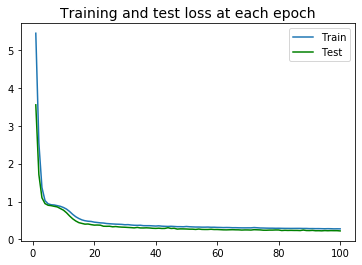

In [5]:
#evaluate the NN model by analyzing mean squared error and R2 score
model.evaluate(X_train, y_train, X_test, y_test)